# Jay(me)
In statistics regarding regression and goodness of  fit high r-squared values aren't always great  due to their being a possible noticeable pattern. Randomness and a lack of a pattern are key ingredients to a good measure of an r-squared value.  Is my interpretation regarding high r-squared values correct?

# ChatGPT
Your interpretation is partially correct, but it's essential to clarify a few points about the interpretation of R-squared values in regression analysis.

R-squared, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables in a regression model. A high R-squared value indicates that a large proportion of the variability in the dependent variable has been explained by the independent variables in the model.

However, it's not accurate to say that a high R-squared value is undesirable due to a noticeable pattern. In fact, a high R-squared value is generally considered desirable because it suggests that the model is doing a good job of explaining the variability in the dependent variable. It indicates that a large percentage of the observed outcomes can be predicted by the model.

What you may be referring to is the concern that a high R-squared value could be misleading if the model is overfitting the data. Overfitting occurs when a model fits the training data too closely, capturing noise and idiosyncrasies in the data that do not generalize well to new, unseen data. In such cases, the model may have a high R-squared value for the training data but may perform poorly on new data.

To address this concern, it's important to consider not only the R-squared value but also other metrics, such as adjusted R-squared, and to validate the model on independent data to assess its generalizability.

In summary, a high R-squared value is generally a positive indicator of how well the model fits the data, but it's crucial to consider the possibility of overfitting and to use additional tools and metrics to evaluate the model's performance.

# Jay
In regards to overfitting did you forget to mention the too many terms for the number of observations being  a cause of overfitting?

# ChatGPT
Yes, you are correct, and I appreciate your observation. Overfitting can indeed occur when the number of predictor variables (terms or features) in a model is too high relative to the number of observations. This situation is known as the "too many predictors" or "too many terms" problem, and it can lead to a model that fits the training data extremely well but fails to generalize to new, unseen data.

When the number of predictors is large compared to the number of observations, the model may end up capturing noise and random fluctuations in the training data rather than the underlying patterns. As a result, the model may perform poorly when applied to new data.

To address this issue, it's crucial to consider the balance between the complexity of the model (number of terms) and the amount of data available for training. Techniques such as feature selection, regularization methods (e.g., Lasso or Ridge regression), and cross-validation can be used to help prevent overfitting by controlling the complexity of the model.

In summary, the "too many terms" problem is indeed a common cause of overfitting, and it's important to be mindful of the balance between model complexity and the amount of available data when building regression models.

# Jay
could you give me an example so I can visually understand the concept of overfitting?

# ChatGPT :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [9]:
# Create a small dataset
np.random.seed(42)
X = 2 * np.random.rand(20, 1)
y = 3 * X + 1.5 * X**2 + np.random.randn(20, 1)

In [10]:
print(X)

[[0.74908024]
 [1.90142861]
 [1.46398788]
 [1.19731697]
 [0.31203728]
 [0.31198904]
 [0.11616722]
 [1.73235229]
 [1.20223002]
 [1.41614516]
 [0.04116899]
 [1.9398197 ]
 [1.66488528]
 [0.42467822]
 [0.36364993]
 [0.36680902]
 [0.60848449]
 [1.04951286]
 [0.86389004]
 [0.58245828]]


In [11]:
print(y)

[[ 2.0760914 ]
 [11.44167933]
 [ 6.69883036]
 [ 4.32999909]
 [ 2.54781151]
 [ 0.85619656]
 [ 0.43627211]
 [ 8.27387538]
 [ 5.23034289]
 [ 7.36755871]
 [-1.02494428]
 [11.83950786]
 [ 8.55178166]
 [ 1.2528683 ]
 [ 0.6876051 ]
 [ 3.15452853]
 [ 2.36733629]
 [ 3.74304354]
 [ 4.53367402]
 [ 1.03541766]]


In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
def fit_and_plot_polynomial(degree, X_train, y_train, X_test, y_test):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    # Predictions on the training set
    y_train_pred = model.predict(X_poly_train)

    # Predictions on the test set
    y_test_pred = model.predict(X_poly_test)

    # Plotting the results
    plt.scatter(X, y, label='Actual data')
    plt.plot(np.sort(X_train, axis=0), np.sort(y_train_pred, axis=0), label='Model (degree=%d)' % degree)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # Print the Mean Squared Error on the test set
    mse = mean_squared_error(y_test, y_test_pred)
    print('Degree %d - Mean Squared Error on Test Set: %.3f' % (degree, mse))

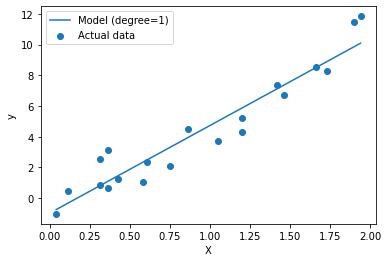

Degree 1 - Mean Squared Error on Test Set: 1.692


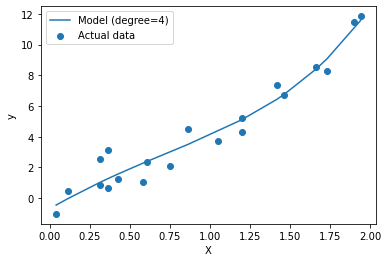

Degree 4 - Mean Squared Error on Test Set: 0.819


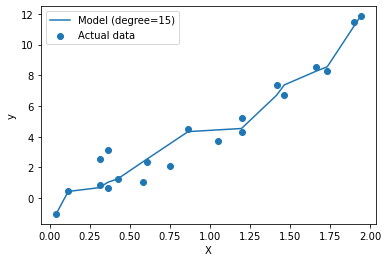

Degree 15 - Mean Squared Error on Test Set: 501442.904


In [17]:
# Fit and plot polynomial regression models of different degrees
degrees = [1, 4, 15]  # Low degree, moderate degree, high degree
for degree in degrees:
    fit_and_plot_polynomial(degree, X_train, y_train, X_test, y_test)

# ChatGPT
In this example, we create a dataset with a quadratic relationship between X and y and then attempt to fit polynomial regression models of varying degrees (1, 4, and 15) to the data. The function fit_and_plot_polynomial fits a polynomial regression model of a specified degree, makes predictions on both the training and test sets, and plots the actual data along with the model's predictions.

As you increase the degree of the polynomial, the model becomes more flexible and can fit the training data more closely. However, as we'll see, a high-degree polynomial may capture noise in the training data and fail to generalize well to new data (overfitting). The Mean Squared Error on the test set is used to quantify the model's performance.

You'll observe that the model with a degree of 1 (linear) has relatively good performance on the test set. However, the model with a degree of 15 fits the training data extremely well but performs poorly on the test set. This discrepancy illustrates the overfitting problem associated with overly complex models.